In [1]:
# importing required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [31]:
# importing dataset
data = pd.read_csv("D:/Logistic_SVM_Model_Titanic/titanic_train.csv")

In [32]:
# Previewing the data
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [33]:
data.shape

(891, 12)

## **EDA**

In [34]:
# Checking data
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [35]:
# Checking a null values
data.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [36]:
data.isna().sum() * 100 / len(data)

PassengerId     0.000000
Survived        0.000000
Pclass          0.000000
Name            0.000000
Sex             0.000000
Age            19.865320
SibSp           0.000000
Parch           0.000000
Ticket          0.000000
Fare            0.000000
Cabin          77.104377
Embarked        0.224467
dtype: float64

*   Missing Values in Age, Cabin and Embarked Columns
*   More than 70 percent values are missing in cabin columns, so we will drop this column
* few Columns have an inappropriate data



In [37]:
data.drop(['Cabin'],axis=1,inplace=True)

In [38]:
# filling missing values with mean value
data['Age'].fillna(data['Age'].mean(), inplace= True)

In [39]:
# finding the most appered values in embarked column and fill with same for that we using mode
data['Embarked'].fillna('S', inplace=True)


In [40]:
# changeing the data type of few columns

data['Survived'] = data['Survived'].astype('category')
data['Pclass'] = data['Pclass'].astype('category')
data['Sex'] = data['Sex'].astype('category')
data['Age'] = data['Age'].astype('int')
data['Embarked'] = data['Embarked'].astype('category')

In [41]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   PassengerId  891 non-null    int64   
 1   Survived     891 non-null    category
 2   Pclass       891 non-null    category
 3   Name         891 non-null    object  
 4   Sex          891 non-null    category
 5   Age          891 non-null    int32   
 6   SibSp        891 non-null    int64   
 7   Parch        891 non-null    int64   
 8   Ticket       891 non-null    object  
 9   Fare         891 non-null    float64 
 10  Embarked     891 non-null    category
dtypes: category(4), float64(1), int32(1), int64(3), object(2)
memory usage: 49.4+ KB


In [42]:
data.describe()

,PassengerId,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,891.000000,891.000000
mean,446.000000,29.544332,0.523008,0.381594,32.204208
std,257.353842,13.013778,1.102743,0.806057,49.693429
min,1.000000,0.000000,0.000000,0.000000,0.000000
25%,223.500000,22.000000,0.000000,0.000000,7.910400
50%,446.000000,29.000000,0.000000,0.000000,14.454200
75%,668.500000,35.000000,1.000000,0.000000,31.000000
max,891.000000,80.000000,8.000000,6.000000,512.329200


Out of 891; 62% people died in the accident


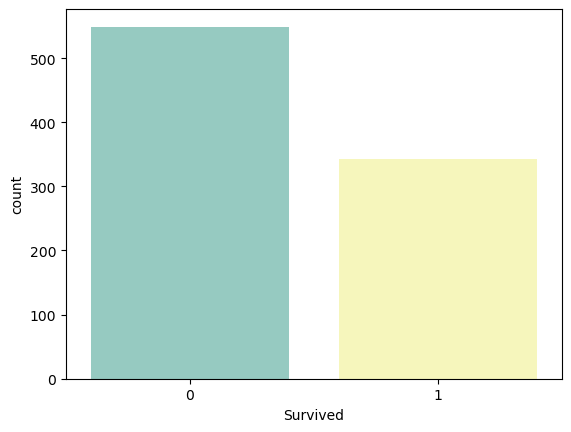

In [43]:
sns.countplot(x=data['Survived'],palette="Set3")
death_percent =round((data['Survived'].value_counts().values[0]/891)*100)
print("Out of 891; {}% people died in the accident".format(death_percent))


Pclass
3    55.106622
1    24.242424
2    20.650954
Name: count, dtype: float64


<Axes: xlabel='Pclass', ylabel='count'>

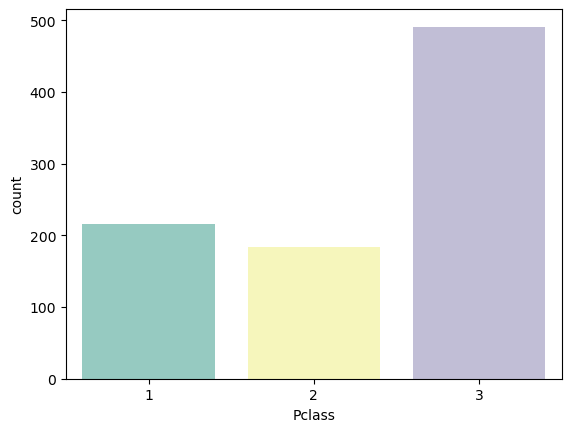

In [44]:
print((data['Pclass'].value_counts()/891)*100)
sns.countplot(x=data['Pclass'],palette="Set3")

<Axes: xlabel='Pclass', ylabel='Age'>

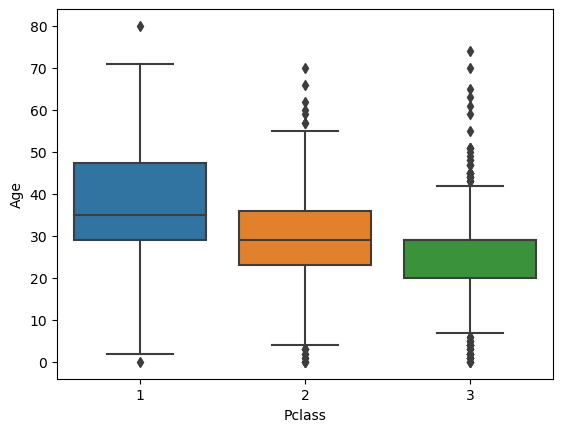

In [45]:
sns.boxplot(x='Pclass',y='Age',data=data)

Sex
male      64.758698
female    35.241302
Name: count, dtype: float64


<Axes: xlabel='Sex', ylabel='count'>

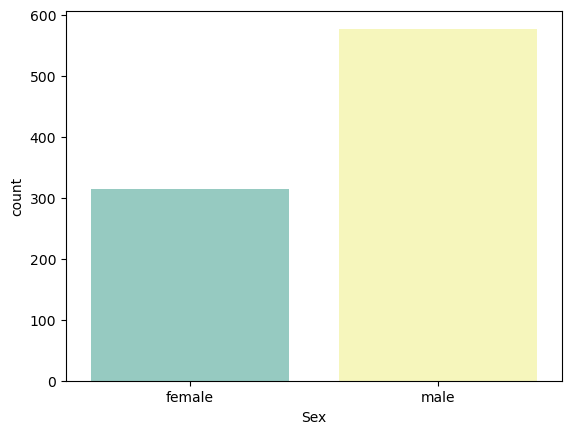

In [46]:
print((data['Sex'].value_counts()/891)*100)
sns.countplot(x=data['Sex'], palette="Set3")

SibSp
0    68.237935
1    23.456790
2     3.142536
4     2.020202
3     1.795735
8     0.785634
5     0.561167
Name: count, dtype: float64


<Axes: xlabel='SibSp', ylabel='count'>

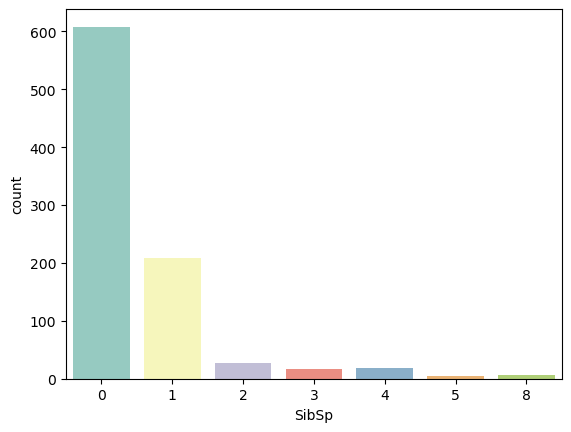

In [47]:
print((data['SibSp'].value_counts()/891)*100)
sns.countplot(x=data['SibSp'],palette="Set3")

Parch
0    76.094276
1    13.243547
2     8.978676
5     0.561167
3     0.561167
4     0.448934
6     0.112233
Name: count, dtype: float64


<Axes: xlabel='Parch', ylabel='count'>

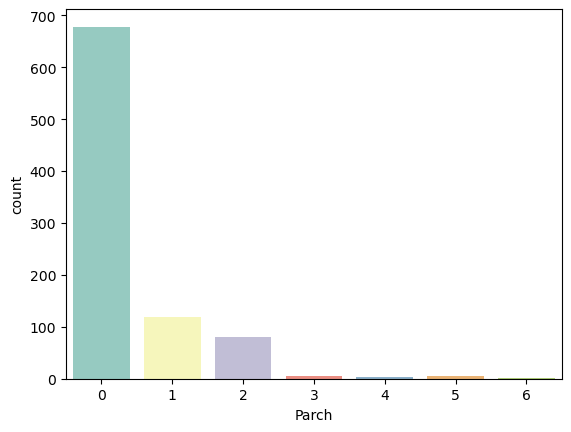

In [48]:
print((data['Parch'].value_counts()/891)*100)
sns.countplot(x=data['Parch'],palette="Set3")

Embarked
S    72.502806
C    18.855219
Q     8.641975
Name: count, dtype: float64


<Axes: xlabel='Embarked', ylabel='count'>

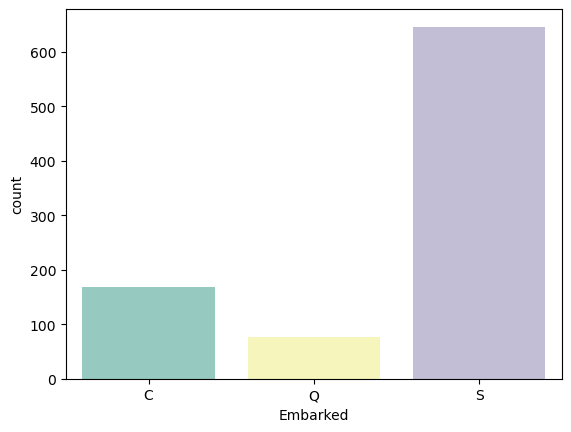

In [49]:
print((data['Embarked'].value_counts()/891)*100)
sns.countplot(x=data['Embarked'],palette="Set3")

0.45956263424701577
0.9865867453652877


C:\Users\Lenovo\AppData\Local\Temp\ipykernel_19592\2675206122.py:3: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.displot(x=data['Age'],palette="Set3", kde =True)
c:\Users\Lenovo\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


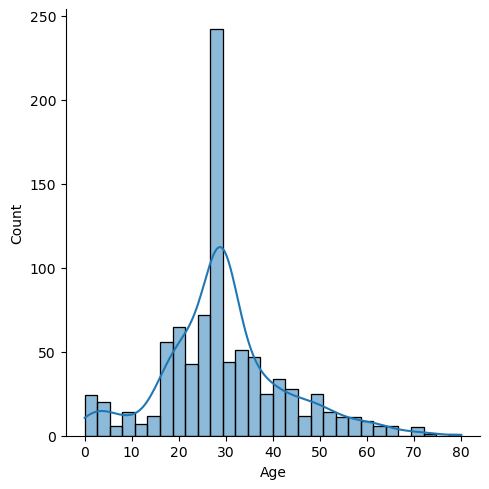

In [50]:
print(data['Age'].skew())
print(data['Age'].kurt())
sns.displot(x=data['Age'],palette="Set3", kde =True)

<Axes: xlabel='Age'>

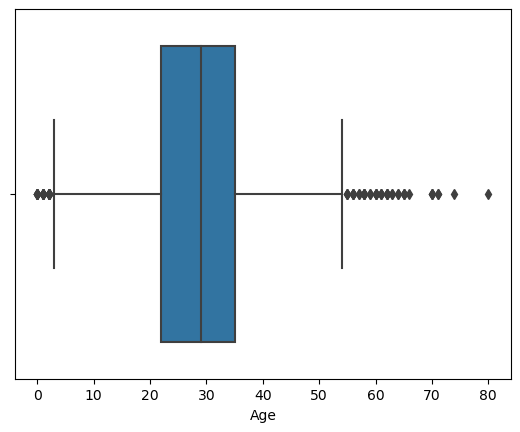

In [51]:
sns.boxplot(x=data['Age'])

In [52]:
print("people with age in between 60 and 70 are", data[(data['Age']>60) & (data['Age']<70)].shape[0])
print("people with age is grater than 70 and 75 are", data[(data['Age']>=70) & (data['Age']<=75)].shape[0])
print("people with age is grater than 75 are", data[(data['Age']>75)].shape[0])

people with age in between 60 and 70 are 15
people with age is grater than 70 and 75 are 6
people with age is grater than 75 are 1


4.787316519674893
33.39814088089868


C:\Users\Lenovo\AppData\Local\Temp\ipykernel_19592\4218516118.py:3: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.displot(x=data['Fare'],palette="Set3", kde =True)
c:\Users\Lenovo\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


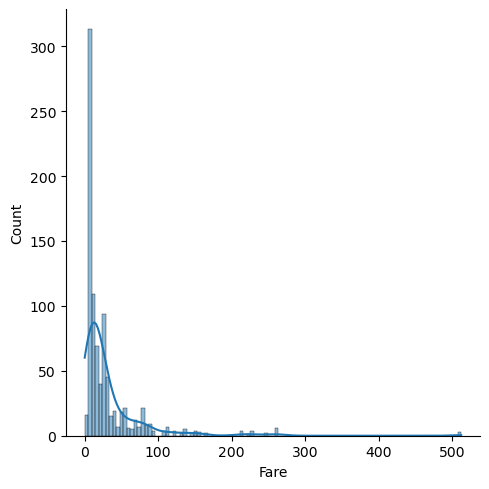

In [53]:
print(data['Fare'].skew())
print(data['Fare'].kurt())
sns.displot(x=data['Fare'],palette="Set3", kde =True)

Survived     0     1
Pclass              
1         37.0  63.0
2         52.7  47.3
3         75.8  24.2


<Axes: xlabel='Survived', ylabel='count'>

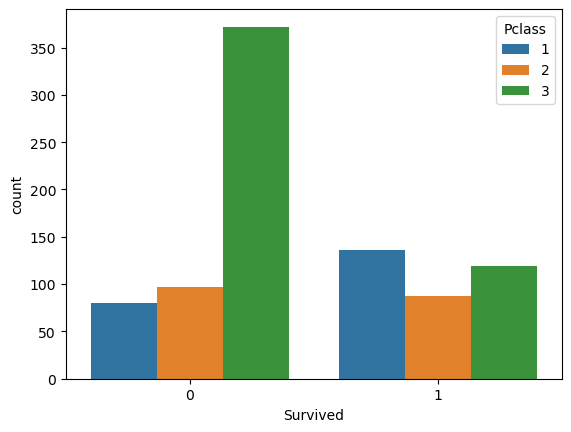

In [54]:
print(pd.crosstab(data['Pclass'],data['Survived']).apply(lambda r : round((r/r.sum())*100,1), axis =1))
sns.countplot(x = data['Survived'], hue =data['Pclass'])

Survived     0     1
Sex                 
female    25.8  74.2
male      81.1  18.9


<Axes: xlabel='Survived', ylabel='count'>

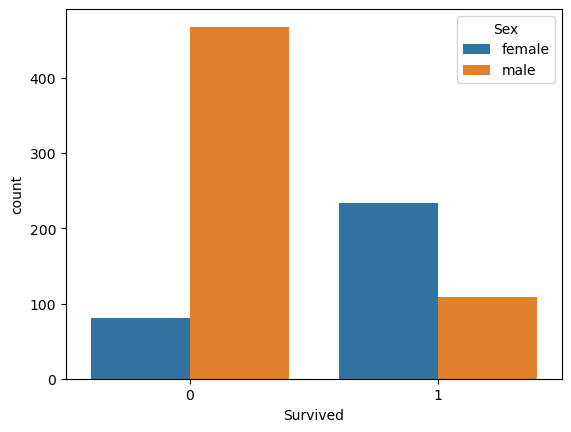

In [55]:
print(pd.crosstab(data['Sex'],data['Survived']).apply(lambda r : round((r/r.sum())*100,1), axis =1))
sns.countplot(x = data['Survived'], hue =data['Sex'])

Survived     0     1
Embarked            
C         44.6  55.4
Q         61.0  39.0
S         66.1  33.9


<Axes: xlabel='Survived', ylabel='count'>

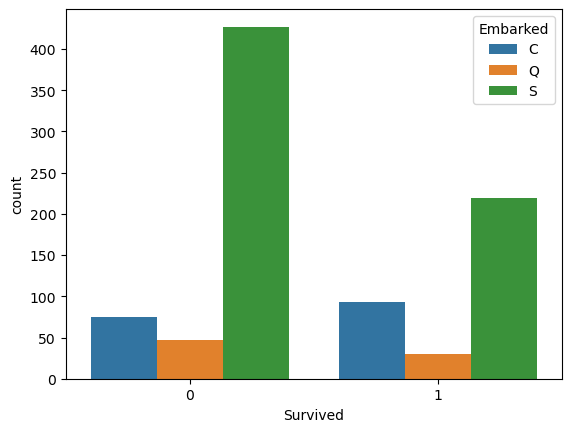

In [56]:
print(pd.crosstab(data['Embarked'],data['Survived']).apply(lambda r : round((r/r.sum())*100,1), axis =1))
sns.countplot(x = data['Survived'], hue =data['Embarked'])

In [57]:
# Feature Engineering
data['FamilySize'] = data['SibSp']+data['Parch']

In [58]:
# naming the family according the size
def Family_type(number):
  if number==0:
    return "Alone"
  elif number>0 and number<=4:
    return "Medium"
  else:
    return "Large"

In [59]:
data['Family_type'] = data['FamilySize'].apply(Family_type)

In [60]:
#dropping the sibsp, parch and FamilySize
data.drop(columns=['SibSp', 'Parch', 'FamilySize'], inplace = True)

In [61]:
print(pd.crosstab(data['Family_type'],data['Survived']).apply(lambda r : round((r/r.sum())*100,1), axis =1))

Survived        0     1
Family_type            
Alone        69.6  30.4
Large        85.1  14.9
Medium       44.0  56.0


In [62]:
def detect_outliers_std(data, Age):
    mean = np.mean(data["Age"])
    std_dev = np.std(data["Age"])
    lower_limit = mean - 3 * std_dev
    upper_limit = mean + 3 * std_dev
    data_no_outliers = data[(data['Age'] > lower_limit) & (data['Age'] < upper_limit)]
    return data_no_outliers

In [63]:
data.shape

(891, 10)

In [64]:
from scipy.stats import zscore

def detect_outliers_zscore(data, Fare):
    z_scores = zscore(data['Fare'])
    data_no_outliers = data[(z_scores > -3) & (z_scores < 3)]
    return data_no_outliers

In [65]:
# One Hot Encoding
data = pd.get_dummies(data= data, columns=['Pclass','Sex','Embarked','Family_type'],drop_first=True)



*   Chances of female surviver is higher than male survial
*   Travelling in Pclass 3 was deadliest
*   People going to C has more survival Rate
*   People in the age range of 20 - 40 had a higher chance of not surviving
*   People travelling with smaller families had a higher chance of survivng the accident in comparison to people with large families and travelling alone



In [67]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 13 columns):
 #   Column              Non-Null Count  Dtype   
---  ------              --------------  -----   
 0   PassengerId         891 non-null    int64   
 1   Survived            891 non-null    category
 2   Name                891 non-null    object  
 3   Age                 891 non-null    int32   
 4   Ticket              891 non-null    object  
 5   Fare                891 non-null    float64 
 6   Pclass_2            891 non-null    bool    
 7   Pclass_3            891 non-null    bool    
 8   Sex_male            891 non-null    bool    
 9   Embarked_Q          891 non-null    bool    
 10  Embarked_S          891 non-null    bool    
 11  Family_type_Large   891 non-null    bool    
 12  Family_type_Medium  891 non-null    bool    
dtypes: bool(7), category(1), float64(1), int32(1), int64(1), object(2)
memory usage: 38.5+ KB


**Model Training**



1.   Logistic Regression Model



In [68]:
from sklearn.model_selection import train_test_split

X = data.drop(columns=['Survived','Name','Ticket'],axis=1)
y = data['Survived']

In [69]:
X_train,X_test,y_train,y_test=train_test_split(X,y, test_size= 0.3, random_state = 101)

In [70]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score


# Define the parameter grid to search over
param_grid = {
    'penalty': ['l1', 'l2'],
    'C': [0.01, 0.1, 1, 10, 100],
    'solver': ['liblinear', 'lbfgs', 'sag']
}

# Create a logistic regression model
model = LogisticRegression()

In [71]:
# Create a GridSearchCV object
grid_search = GridSearchCV(model, param_grid, scoring='accuracy', cv=5)

# Fit the grid search to the data
grid_search.fit(X_train, y_train)

c:\Users\Lenovo\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
c:\Users\Lenovo\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
c:\Users\Lenovo\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
c:\Users\Lenovo\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached whic

GridSearchCV(cv=5, estimator=LogisticRegression(),
             param_grid={'C': [0.01, 0.1, 1, 10, 100], 'penalty': ['l1', 'l2'],
                         'solver': ['liblinear', 'lbfgs', 'sag']},
             scoring='accuracy')

In [72]:
# Get the best hyperparameters
best_params = grid_search.best_params_
print("Best hyperparameters: ", best_params)

Best hyperparameters:  {'C': 100, 'penalty': 'l2', 'solver': 'lbfgs'}


In [73]:
# Create a new Logistic model with the best hyperparameters
model = LogisticRegression(**best_params)

In [74]:
# Fit the model to the training data
model.fit(X_train, y_train)

c:\Users\Lenovo\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression(C=100)

In [75]:
y_pred = model.predict(X_test)
test_accuracy = accuracy_score(y_test, y_pred)
print("Test accuracy:", test_accuracy)

Test accuracy: 0.7723880597014925


 **Model Evaluation :**
Logistic Regression

In [76]:
y_pred = model.predict(X_test)

In [77]:
from sklearn import metrics
class_report = metrics.classification_report(y_test,y_pred)
print(class_report)

              precision    recall  f1-score   support

           0       0.77      0.86      0.81       154
           1       0.77      0.66      0.71       114

    accuracy                           0.77       268
   macro avg       0.77      0.76      0.76       268
weighted avg       0.77      0.77      0.77       268



[[132  22]
 [ 39  75]]


<Axes: >

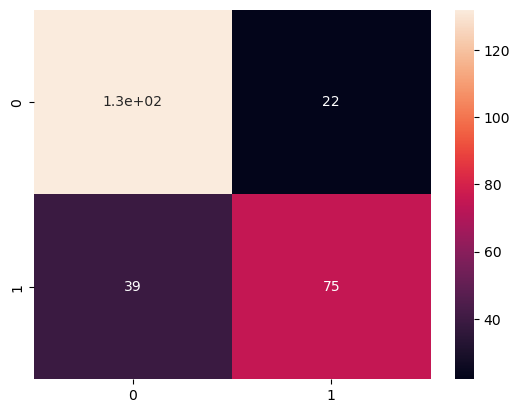

In [78]:
conv_mat = metrics.confusion_matrix(y_test,y_pred)
print(conv_mat)
sns.heatmap(conv_mat, annot=True)

In [79]:
accuracy = metrics.accuracy_score(y_test,y_pred)
print("Accuracy for logistic-test:", "{0:0.4f}".format(model.score(X_test, y_test) * 100) + "%")

print("Accuracy for logistic-train:", "{0:0.4f}".format(model.score(X_train, y_train) * 100) + "%")

Accuracy for logistic-test: 77.2388%
Accuracy for logistic-train: 82.1830%


In [80]:
import pickle

# Save the model to a file
with open('logistic_model.pkl', 'wb') as f:
    pickle.dump(model, f)



2.   Support Vector Machine


In [81]:
from sklearn import svm
from sklearn.metrics import accuracy_score
from sklearn.model_selection import GridSearchCV

In [82]:
# Define the hyperparameters to search over
param_grid = {'C': [1, 10, 100],
              'gamma': [0.001, 0.01, 0.1],
              'kernel': ['linear', 'rbf']}

# Create a Support Vector Machine Classification model
svm_model = svm.SVC()

# Create a grid search object
grid_search = GridSearchCV(svm_model, param_grid, cv=5, scoring='accuracy')

# Fit the grid search object to the training data
grid_search.fit(X_train, y_train)

# Get the best hyperparameters
best_params = grid_search.best_params_
print("Best hyperparameters: ", best_params)

# Create a new SVM model with the best hyperparameters
svm_model = svm.SVC(**best_params)

# Fit the model to the training data
svm_model.fit(X_train, y_train)

In [ ]:
y_pred1 = svm_model.predict(X_test)

In [ ]:
accuracy = accuracy_score(y_test, y_pred1)
print("Accuracy: {:.2f}%".format(accuracy * 100))

Accuracy: 77.61%


In [ ]:
accuracy = metrics.accuracy_score(y_test,y_pred1)
print("Accuracy for logistic-test:", "{0:0.4f}".format(svm_model.score(X_test, y_test) * 100) + "%")

print("Accuracy for logistic-train:", "{0:0.4f}".format(svm_model.score(X_train, y_train) * 100) + "%")

Accuracy for logistic-test: 77.6119%
Accuracy for logistic-train: 81.7014%


In [ ]:
from sklearn import metrics
class_report = metrics.classification_report(y_test,y_pred1)
print(class_report)

              precision    recall  f1-score   support

           0       0.76      0.88      0.82       154
           1       0.80      0.63      0.71       114

    accuracy                           0.78       268
   macro avg       0.78      0.76      0.76       268
weighted avg       0.78      0.78      0.77       268



[[136  18]
 [ 42  72]]


<Axes: >

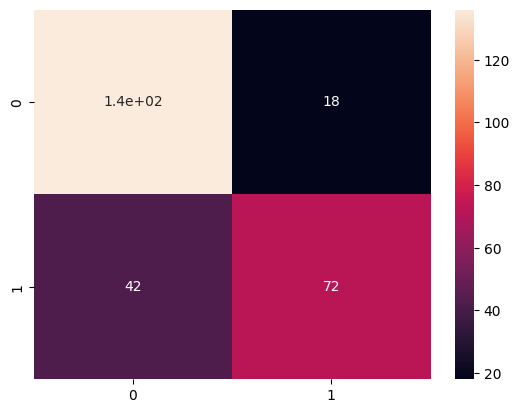

In [ ]:
conv_mat = metrics.confusion_matrix(y_test,y_pred1)
print(conv_mat)
sns.heatmap(conv_mat, annot=True)

In [ ]:
import pickle

# Save the model to a file
with open('svm_model.pkl', 'wb') as f:
    pickle.dump(svm_model, f)
